In [6]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created June 26, 2023 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
#Specify the font
#Latex needs to be installed! If not installed, please comment the following 5 lines
parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
          'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.test_problems.Deblurring import *
from trips.utilities.operators import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *
from trips.solvers.arnoldi_tikhonov import *

In [7]:
#Deblurring example test problem
Deblur = Deblurring()
#In the class Deblurring we have can define the type of problem to be used.
generate_matrix = False #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 128 # Define the first dimension of the image
imagesize_y = 128 # Defines the second dimension of the image
spread = 3 # The PSF parameter
choose_image = 'satellite128' #The choice of the image
if generate_matrix == True:
        size = imagesize_x
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
else:
        A = Deblur.forward_Op([11,11], spread = spread, nx = imagesize_x, ny = imagesize_y)
        (x_true, nx, ny) = Deblur.generate_true(choose_image)
(x_true, nx, ny) = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
x_true = x_true.reshape((nx, ny))

AttributeError: 'Deblurring' object has no attribute 'generate_true'

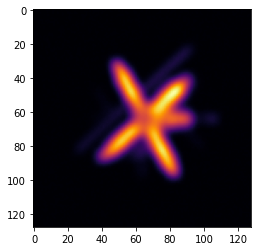

In [47]:
plt.imshow(b.reshape((nx, ny)))

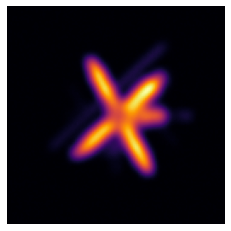

<Figure size 432x288 with 0 Axes>

In [48]:
Deblur.plot_rec(b.reshape((nx, ny)))

In [32]:
b_vec = b.reshape((-1,1))
(xx, reg_param) = arnoldi_tikhonov(A, b_vec, projection_dim= 40, regparam = 'gcv', delta = delta)

generating basis...:   0%|          | 0/40 [00:00<?, ?it/s]

generating basis...: 100%|██████████| 40/40 [00:00<00:00, 95.09it/s] 

99.99999276961968


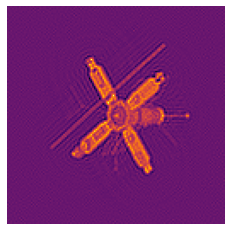

<Figure size 432x288 with 0 Axes>

In [29]:
Deblur.plot_rec(xx.reshape((nx, ny)), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)

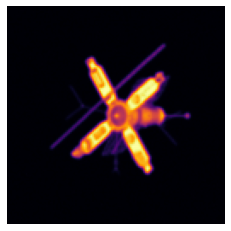

<Figure size 432x288 with 0 Axes>

In [30]:
Deblur.plot_rec(b.reshape((nx, ny)), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)